In [1]:
# set parameter and csv file path

is_need_preprocessing = False
csv_file_path = 'asdf_single_space_log_preprocessing.csv'

In [2]:
# ignore warnings

import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
import numpy as np
import pandas as pd

In [4]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

if is_need_preprocessing:

    x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
    y_names = ['a', 's', 'd', 'f', 'None']

    col_names = x_names + y_names

    df = pd.read_csv(csv_file_path, names=col_names)
    df.head()

In [5]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

if is_need_preprocessing:
    y_names_origin = ['a', 's', 'd', 'f']

    for row in range(len(df)):
        df['None'].iloc[row] = 1
        for value in df[y_names_origin].iloc[row]:
            if value == 1:
                df['None'].iloc[row] = 0
                break

In [6]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

if is_need_preprocessing:
    import sys, os
    sys.path.append(os.pardir)

    from visualization.smoother import gamma_smoothing, average_smoothing

    df = gamma_smoothing(df)  # takes about 1 min
    # df = average_smoothing(df)
    df.head()

In [7]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음
# normalization, about 1 min

if is_need_preprocessing:
	from sklearn.preprocessing import MinMaxScaler
	scaler = MinMaxScaler()

	for column in x_names:
		df_column = df[column]
		df_column = df_column.values.reshape(-1, 1)
		df_column = scaler.fit_transform(df_column)

		for row in range(len(df)):
			df[column].iloc[row] = df_column[row]


In [8]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음
# 원본 데이터 전처리 한 것 csv 로 저장

if is_need_preprocessing:

    import pandas as pd
    from pandas import DataFrame

    df.to_csv(csv_file_path(replace(".csv", "_preprocessing.csv")), sep=",", index=False, header=False)

In [9]:
# asdf_single_space_log_preprocessing.csv를 이용해 전처리 과정 스킵하고 바로 불러오기

if not is_need_preprocessing:
    file_path = csv_file_path

    x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
    y_names = ['a', 's', 'd', 'f', 'None']

    col_names = x_names + y_names

    df = pd.read_csv(csv_file_path, names=col_names)
    df.head()


In [10]:
# x, y split
x, y = df[x_names], df[y_names]

In [11]:
# train, test split
train_test_ratio = 0.95

train_num = int(len(df) * 0.95)

x_train, x_test = x[:train_num], x[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

# train_test_ratio = 0.2

# train_num = int(len(df) * 0.2)

# x_train, x_test = x[train_num:], x[:train_num]
# y_train, y_test = y[train_num:], y[:train_num]

In [27]:
# apply mlp

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(63,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=100)

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/100
535/535 [==============================] - 1s 727us/step - loss: 1.0921 - accuracy: 0.6193
Epoch 2/100
535/535 [==============================] - 0s 755us/step - loss: 0.7126 - accuracy: 0.7275
Epoch 3/100
535/535 [==============================] - 0s 755us/step - loss: 0.5958 - accuracy: 0.7616
Epoch 4/100
535/535 [==============================] - 0s 768us/step - loss: 0.5398 - accuracy: 0.7859
Epoch 5/100
535/535 [==============================] - 0s 727us/step - loss: 0.5088 - accuracy: 0.7992
Epoch 6/100
535/535 [==============================] - 0s 738us/step - loss: 0.4874 - accuracy: 0.8108
Epoch 7/100
535/535 [==============================] - 0s 730us/step - loss: 0.4786 - accuracy: 0.8101
Epoch 8/100
535/535 [==============================] - 0s 682us/step - loss: 0.4695 - accuracy: 0.8165
Epoch 9/100
535/535 [==============================] - 0s 652us/step - loss: 0.4583 - accuracy: 0.8233
Epoch 10/100
535/535 [==============================] - 0s 629us/step - l

[0.6889029145240784, 0.8013318777084351]

In [29]:
predict = model.predict(x_test)

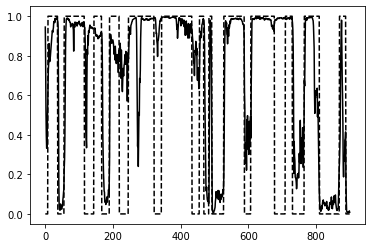

In [30]:
import matplotlib.pyplot as plt

size = len(y_test)

plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4], 'k')

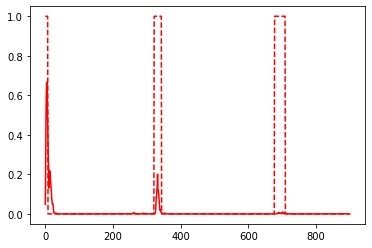

In [31]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0], 'r')


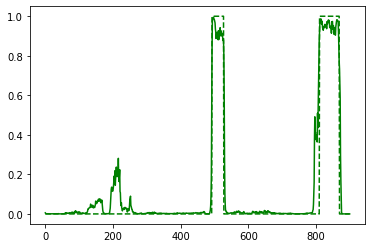

In [32]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1], 'g')

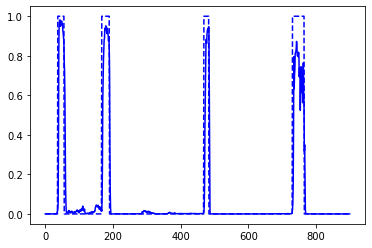

In [33]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2], 'b')

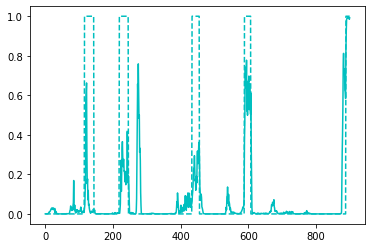

In [34]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3], 'c')

In [35]:
def up_sensivity(data, sensivity=2):

    denominator = (sensivity * sum(data) - (sensivity - 1)* data[4])
    
    data[0], data[1], data[2], data[3], data[4] = (
    sensivity * data[0] / denominator,
    sensivity * data[1] / denominator,
    sensivity * data[2] / denominator,
    sensivity * data[3] / denominator,
    data[4] / denominator
    )

    return data
    

In [36]:
for row in range(len(predict)):
    predict[row] = up_sensivity(predict[row], 3)

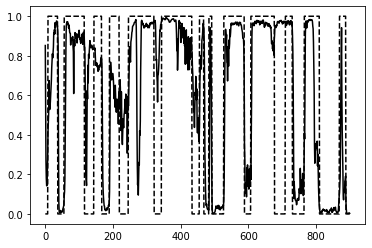

In [37]:
plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4], 'k')

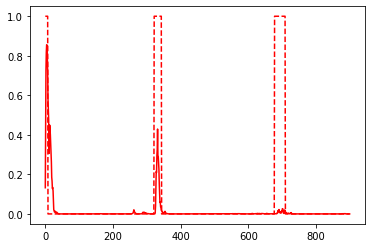

In [38]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0], 'r')

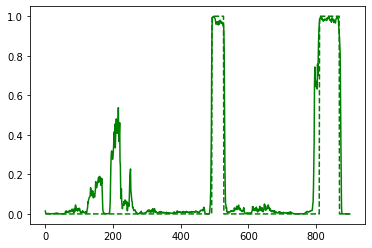

In [39]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1], 'g')

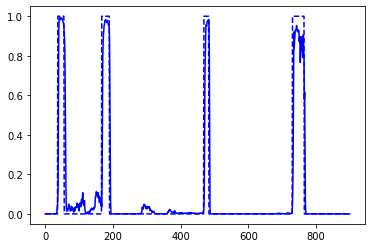

In [40]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2], 'b')

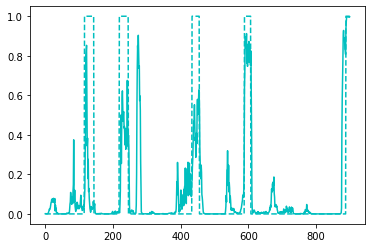

In [41]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3], 'c')